In [105]:
# import the necessary packages
from collections import deque
from imutils.video import VideoStream
import numpy as np
import argparse
import imutils
from skimage.morphology import erosion, dilation, opening, closing
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from PIL import Image
from IPython.display import Image as IPImage, display

(np.float64(-0.5), np.float64(639.5), np.float64(399.5), np.float64(-0.5))

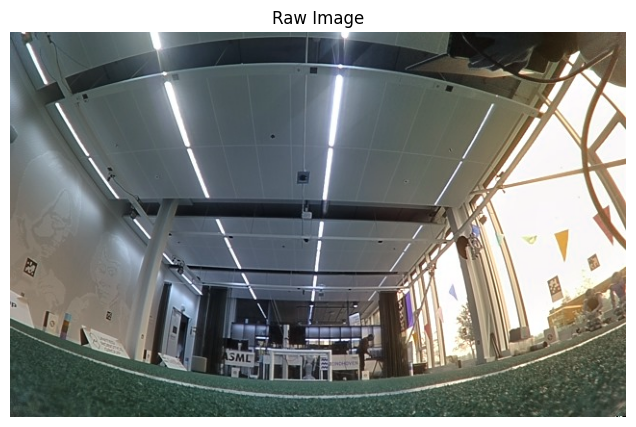

In [106]:
# ORIGINAL IMAGE
img = cv2.imread("raw_img.jpg") #,cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread("raw_img.jpg") 
img2 = cv2.imread("raw_img.jpg") 
img3 = cv2.imread("raw_img.jpg") 
imgc = cv2.imread("raw_img.jpg") 
plt.figure(figsize=(10, 5))
plt.title('Raw Image')
plt.imshow(img) #, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(203.5), np.float64(130.5), np.float64(-0.5))

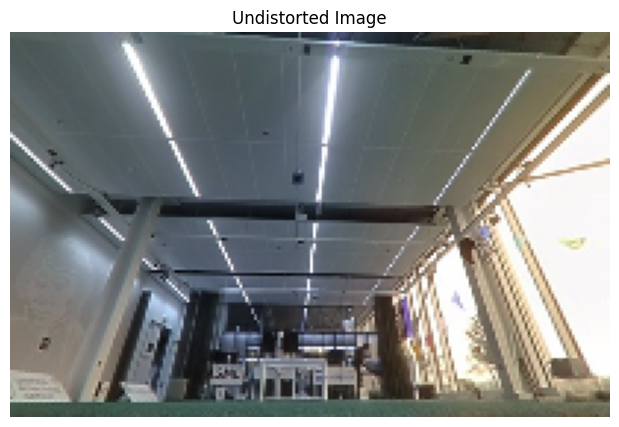

In [107]:
# UNDISTORTED IMAGE
mtx =np.array([[ 2.669181802221449971e+02, 0.000000000000000000e+00, 3.211123369317951983e+02],
      [0.000000000000000000e+00, 2.655683946392876464e+02, 2.100510773739977708e+02],
      [0.000000000000000000e+00, 0.000000000000000000e+00, 1.000000000000000000e+00]])

dist = np.array([-2.664491263057180426e-01, 8.451640196225880530e-02, -1.639067929699194277e-03, -5.280427598176776855e-04, -1.322285119880311534e-02])
h, w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
dst1 = cv2.undistort(img1, mtx, dist, None, newcameramtx)
dst2 = cv2.undistort(img2, mtx, dist, None, newcameramtx)
dst3 = cv2.undistort(img3, mtx, dist, None, newcameramtx)
dstc = cv2.undistort(img3, mtx, dist, None, newcameramtx)
x, y, w, h = roi
img = dst[y:y + h, x:x + w]
img1 = dst1[y:y + h, x:x + w]
img2 = dst2[y:y + h, x:x + w]
img3 = dst3[y:y + h, x:x + w]
imgc = dstc[y:y + h, x:x + w]

plt.figure(figsize=(10, 5))
plt.title('Undistorted Image')
plt.imshow(img) #, cmap='gray')
plt.axis('off')


(np.float64(-0.5), np.float64(203.5), np.float64(130.5), np.float64(-0.5))

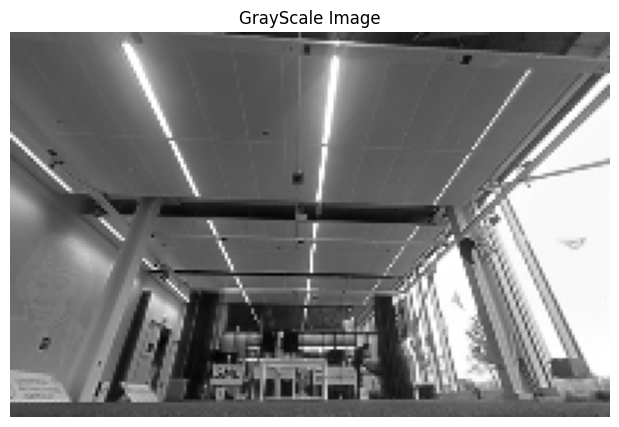

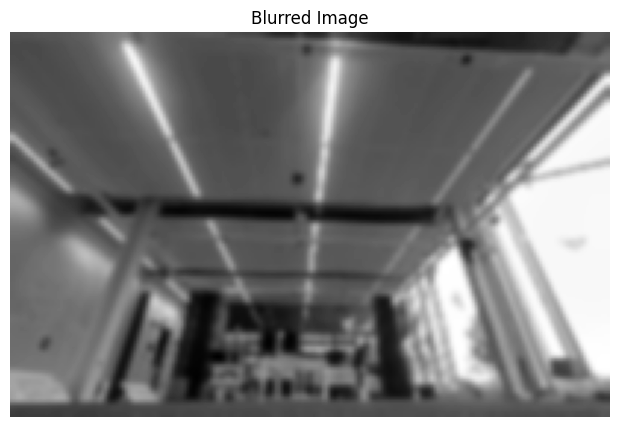

In [108]:
# GRAY IMAGE
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))
plt.title('GrayScale Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

# BLURRED IMAGE
bright = cv2.convertScaleAbs(
            gray, alpha=1, beta=0
        )  # adjust brightness if needed
blurred = cv2.GaussianBlur(bright, (5, 5), 0)


plt.figure(figsize=(10, 5))
plt.title('Blurred Image')
plt.imshow(blurred, cmap='gray')
plt.axis('off')



(np.float64(-0.5), np.float64(203.5), np.float64(130.5), np.float64(-0.5))

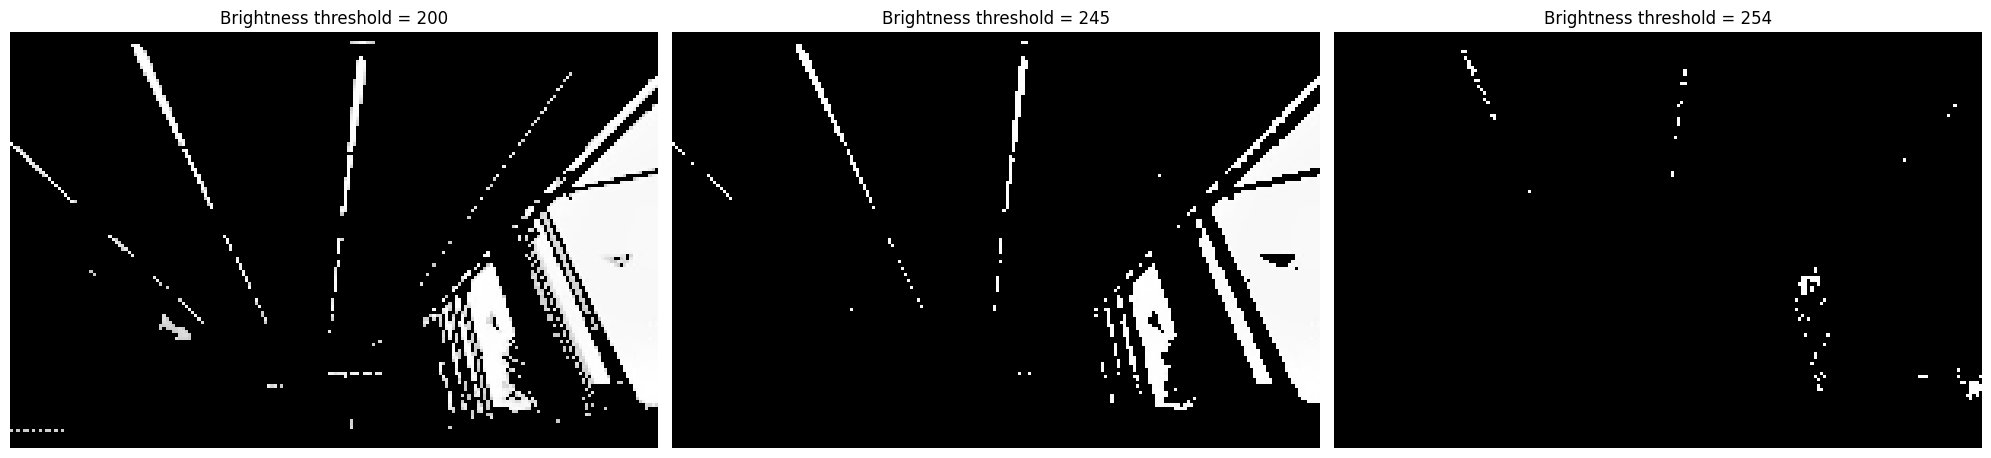

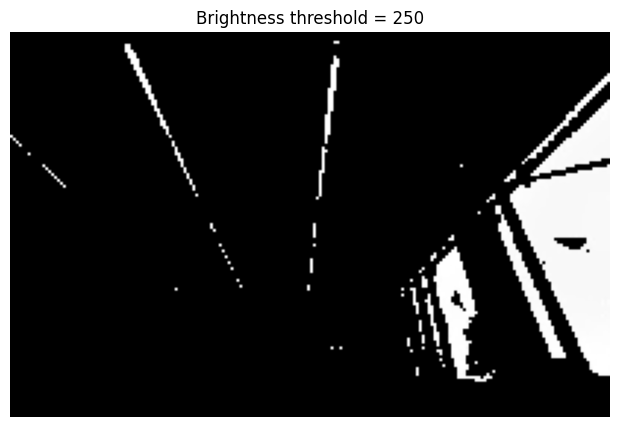

In [109]:

# BRIGHTNESS THRESHOLD
plt.figure(figsize=(20, 15))

_, mask245 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
masked_image_245 = cv2.bitwise_and(gray, gray, mask=mask245)
plt.subplot(1, 3, 1)
plt.title('Brightness threshold = 200')
plt.imshow(masked_image_245, cmap='gray')
plt.axis('off')

_, mask250 = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY)
masked_image_250 = cv2.bitwise_and(gray, gray, mask=mask250)
plt.subplot(1, 3, 2)
plt.title('Brightness threshold = 245')
plt.imshow(masked_image_250, cmap='gray')
plt.axis('off')


_, mask253 = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY)
masked_image_253 = cv2.bitwise_and(gray, gray, mask=mask253)
plt.subplot(1, 3, 3)
plt.title('Brightness threshold = 254')
plt.imshow(masked_image_253, cmap='gray')
plt.axis('off')
plt.tight_layout(pad=1.01)



_, mask250c = cv2.threshold(blurred, 250, 255, cv2.THRESH_BINARY)
masked_image_250c = cv2.bitwise_and(blurred, blurred, mask=mask250)
plt.figure(figsize=(10,5))
plt.title('Brightness threshold = 250')
plt.imshow(masked_image_250, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(203.5), np.float64(130.5), np.float64(-0.5))

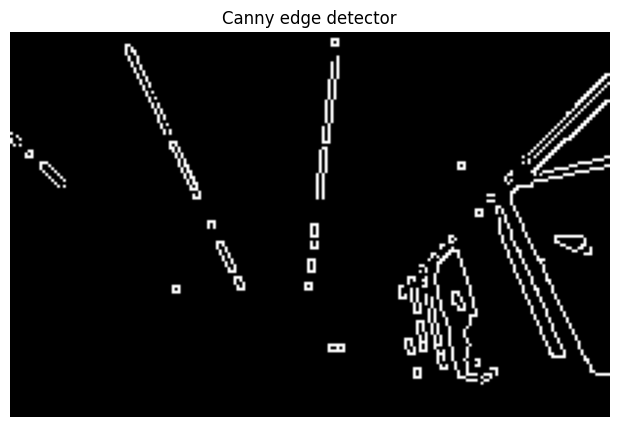

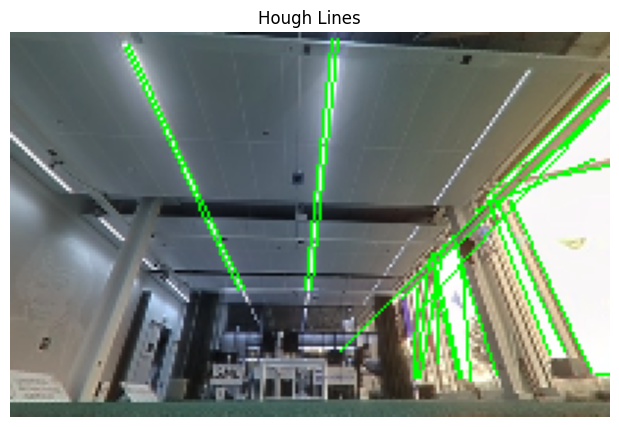

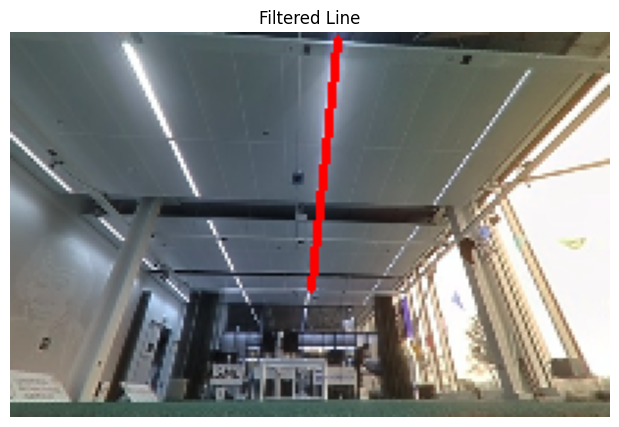

In [110]:
# CANNY EDGE DETECTOR
edges = cv2.Canny(masked_image_250c, 150, 200)
plt.figure(figsize=(10, 5))
plt.title('Canny edge detector')
plt.imshow(edges, cmap='gray')
plt.axis('off')

imgc_copy = imgc.copy()
# HOUGH TRANSFORM
lines = cv2.HoughLinesP(
            edges, 1, np.pi / 180, threshold=15, minLineLength=2, maxLineGap=20
        )

for line in lines:
    x1, y1, x2, y2 = line[0]  # Extract the coordinates from the line
    cv2.line(imgc, (x1, y1), (x2, y2), (0, 255, 0), 1)

plt.figure(figsize=(10, 5))
plt.title('Hough Lines')
plt.imshow(imgc) #, cmap='gray')
plt.axis('off')


# FILTER OTHER OUT
dist = []
for line in lines:
    x1, y1, x2, y2 = line[0]  # Extract the coordinates from the line
    dist.append((x1, y1, x2, y2, abs(x1-imgc.shape[1]/2)))

min_dist_line = min(dist,  key=lambda x: (x[4]))
x1, y1, x2, y2, _ = min_dist_line
cv2.line(imgc_copy, (x1, y1), (x2, y2), (255,0, 0), 2)


plt.figure(figsize=(10, 5))
plt.title('Filtered Line')
plt.imshow(imgc_copy) #, cmap='gray')
plt.axis('off')   

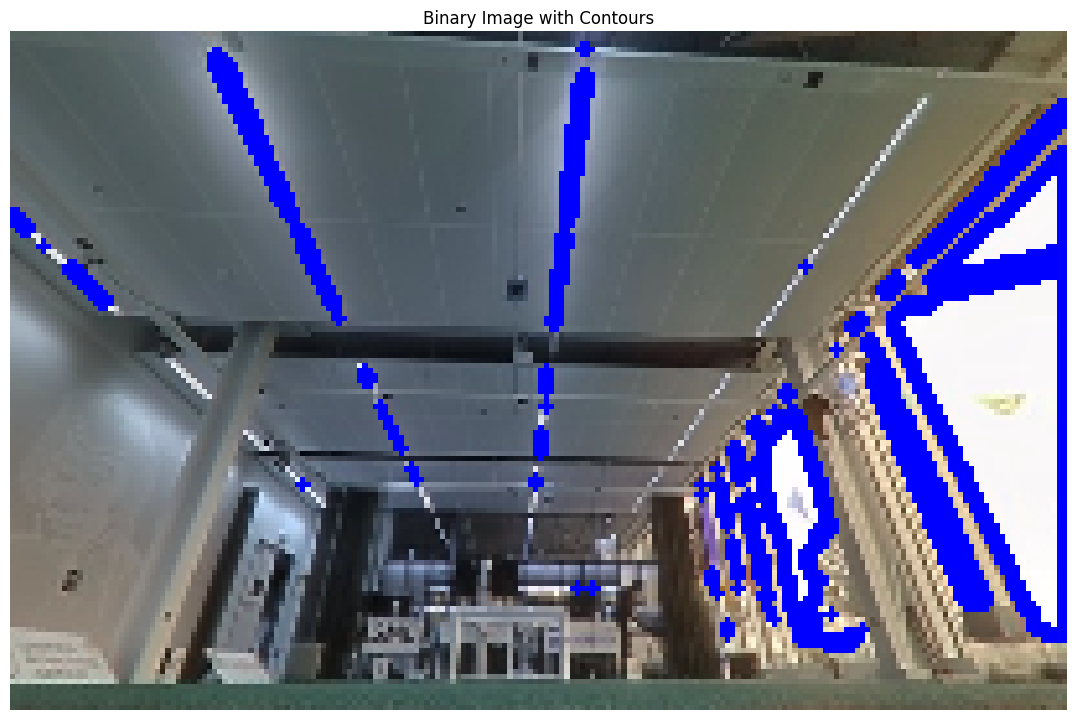

In [111]:
# Convert binary image to 3 channels (RGB) to add blue contours
masked_image_rgb = cv2.cvtColor(masked_image_250, cv2.COLOR_GRAY2BGR)
masked_image_rgb1 = cv2.cvtColor(masked_image_250, cv2.COLOR_GRAY2BGR)
masked_image_rgb2 = cv2.cvtColor(masked_image_250, cv2.COLOR_GRAY2BGR)

# Detect contours
contours, _ = cv2.findContours(masked_image_250, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours in blue
cv2.drawContours(img, contours, -1, (0, 0, 255), 2)  # Blue color in BGR format

# Display the result
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.title('Binary Image with Contours')
plt.imshow(img)  # No cmap needed, as it's now RGB
plt.axis('off')
plt.show()


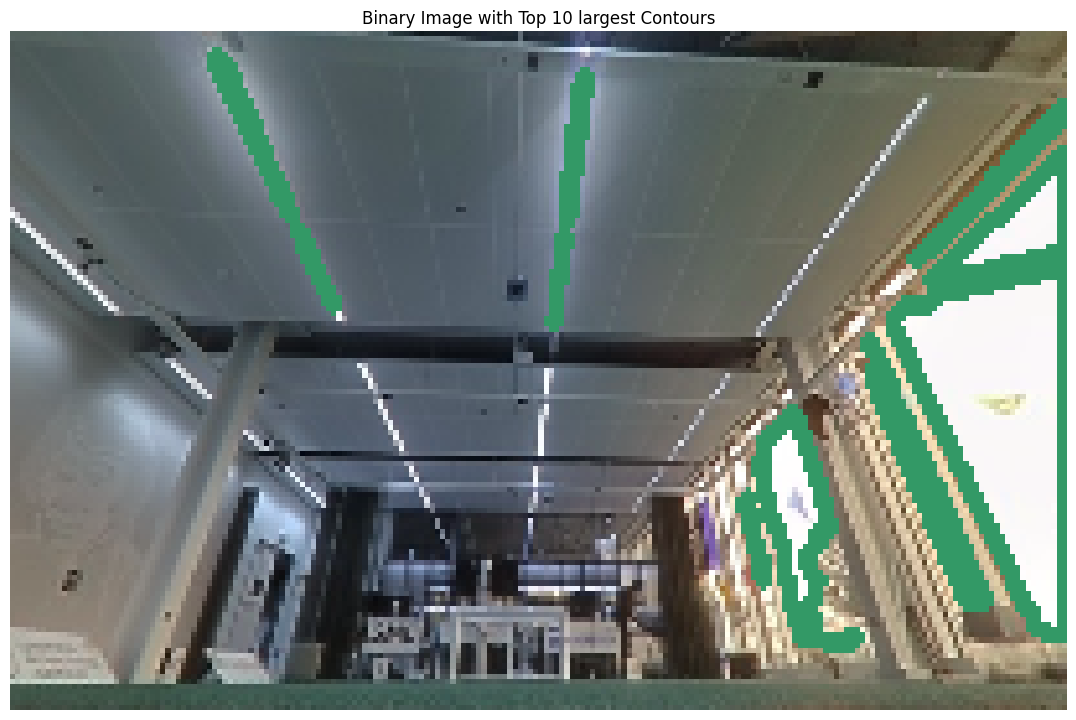

In [112]:
# Keeping top 10 biggest contours
contours10 = sorted(contours, key=len, reverse=True)[:10]
cv2.drawContours(img1, contours10, -1, ( 51, 153, 102), 2)  # Blue color in BGR format

# Display the result
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.title('Binary Image with Top 10 largest Contours')
plt.imshow(img1)  # No cmap needed, as it's now RGB
plt.axis('off')
plt.show()


Contour 0 , Slope: [2.3613849] Error: 1.4897188222591315 length 85
Contour 3 , Slope: [2.1280098] Error: 0.5254507292400706 length 55
Contour 4 , Slope: [2.1592002] Error: 0.24083228508631388 length 30
Contour 5 , Slope: [-1.0517017] Error: 0.5135091476970248 length 27
Contour 7 , Slope: [4.7596807] Error: 0.38284801735597496 length 17
Contour 8 , Slope: [-8.438081] Error: 0.499538799857392 length 17
Contour 9 , Slope: [-8.909735] Error: 0.4319718718528748 length 10


C:\Users\marin\AppData\Local\Temp\ipykernel_22532\1159054287.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x1 = int(x0 - 1000 * vx)
C:\Users\marin\AppData\Local\Temp\ipykernel_22532\1159054287.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1 = int(y0 - 1000 * vy)
C:\Users\marin\AppData\Local\Temp\ipykernel_22532\1159054287.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x2 = int(x0 + 1000 * vx)
C:\Users\marin\AppData\Local\Temp\ipykernel_22532\11

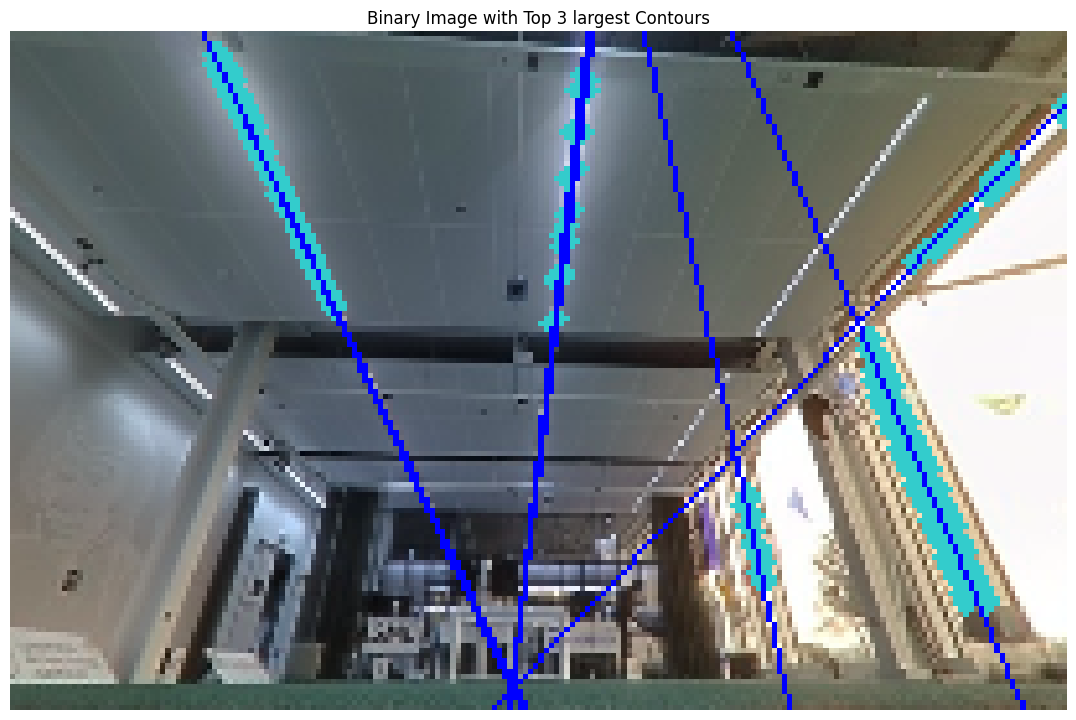

In [113]:
# ADJUST ILNE TO THEM AND REMOVE THOSE WITH ERROR <2
error_threshold = 2
lines_info = []
font = cv2.FONT_HERSHEY_SIMPLEX
# xs=[]
for i, contour in enumerate(contours10):
    points = contour.reshape(-1, 2)
    [vx, vy, x0, y0] = cv2.fitLine(points, cv2.DIST_L2, 0, 0.01, 0.01)
    slope = vy / vx if vx != 0 else float('inf')
    a = -vy
    b = vx
    c = vy * x0 - vx * y0
    errors =  np.abs(a * points[:, 0] + b * points[:, 1] + c) / np.sqrt(a**2 + b**2)
    if np.mean(errors) <2:
        # cv2.putText(masked_image_rgb, str(i), (int(x0), int(y0+10)), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
        print("Contour",i,", Slope:",slope, "Error:", np.mean(errors), "length", len(points))
        lines_info.append((slope,  np.mean(errors), contour, (vx, vy, x0, y0), abs(x0-masked_image_rgb.shape[1]/2)))
        # xs.append(abs(x0-masked_image_rgb.shape[1]/2))    




contours6 = [cont for line in lines_info for cont in line[2]]
# contours3 =[cont for cont in line[2] for line in lines_info[:3]]
cv2.drawContours(img2, contours6, -1, ( 51, 204, 204), 3)  # Blue color in BGR format

for slope, _, contour, (vx, vy, x0, y0), dist in lines_info:
    x1 = int(x0 - 1000 * vx)
    y1 = int(y0 - 1000 * vy)
    x2 = int(x0 + 1000 * vx)
    y2 = int(y0 + 1000 * vy)
    cv2.line(img2, (x1, y1), (x2, y2), (0, 0, 255), 1)


# Display the result
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.title('Binary Image with Top 3 largest Contours')
plt.imshow(img2)  # No cmap needed, as it's now RGB
plt.axis('off')
plt.show()

C:\Users\marin\AppData\Local\Temp\ipykernel_22532\582039443.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x1 = int(x0 - 1000 * vx)
C:\Users\marin\AppData\Local\Temp\ipykernel_22532\582039443.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1 = int(y0 - 1000 * vy)
C:\Users\marin\AppData\Local\Temp\ipykernel_22532\582039443.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x2 = int(x0 + 1000 * vx)
C:\Users\marin\AppData\Local\Temp\ipykernel_22532\58203944

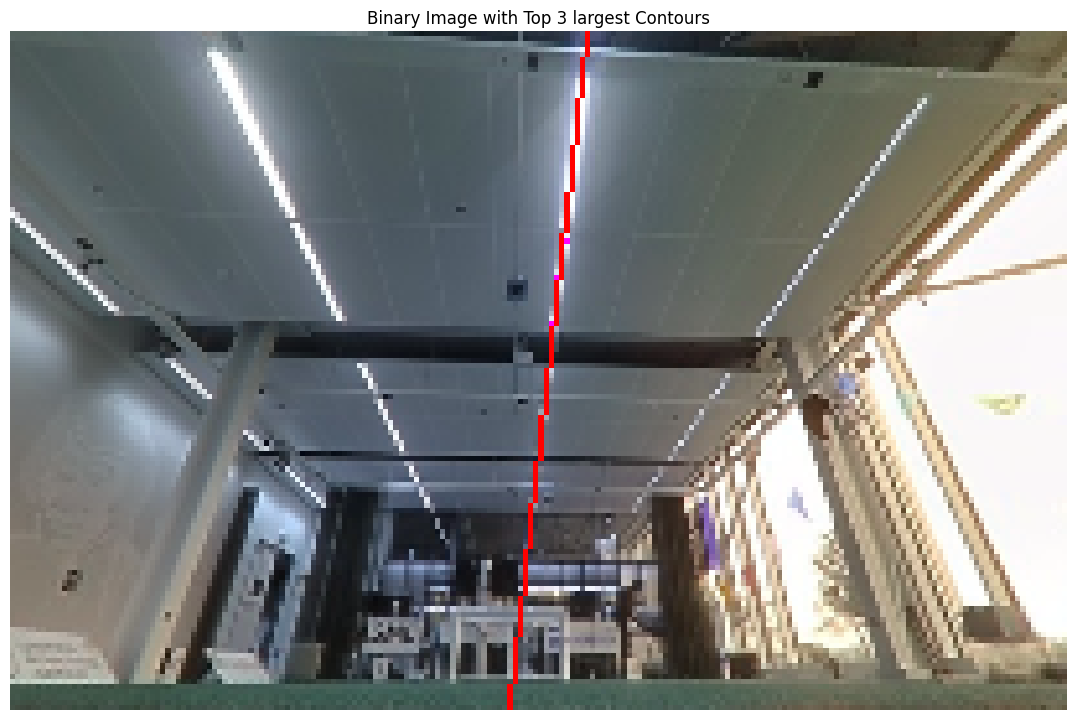

In [114]:
# PICK THE ONE THATS THE MOST IN THE CENTER
min_dist_line = min(lines_info, key=lambda x: min(x[4]))  # x[4] is the xs value

# Extract the contour from that entry
pe, _, contour, (vx, vy, x0, y0), dist = min_dist_line
x1 = int(x0 - 1000 * vx)
y1 = int(y0 - 1000 * vy)
x2 = int(x0 + 1000 * vx)
y2 = int(y0 + 1000 * vy)

cv2.drawContours(img3, [contour], -1, (255, 0, 255), 1)

cv2.line(img3, (x1, y1), (x2, y2), (255, 0, 0), 1)
# Display the result
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.title('Binary Image with Top 3 largest Contours')
plt.imshow(img3)  # No cmap needed, as it's now RGB
plt.axis('off')
plt.show()